In [4]:
# Importações

# Importação de pedidos de API
import requests

# API do googlemaps
import googlemaps

# Hora e tempo
from datetime import datetime

#Importação do Pandas e Numpy
import pandas as pd
import numpy as np

# Bibliotecas para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Pacote para separação de dados de treino e teste
from sklearn.model_selection import train_test_split

# Algoritmo Decision Tree e Naive Bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Pacote para ignorar advertências nos outputs
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Localização de estações de carregamento de carros elétricos usando a API do OpenChargeMap

# Chave de API
api_key = "23bbd1c5-699f-4ccf-ac78-c0c215db426d"

# Definir as coordenadas geográficas (exemplo: San Francisco)
latitude = 37.7749
longitude = -122.4194

# URL da API
url = f"https://api.openchargemap.io/v3/poi/?key={api_key}&latitude={latitude}&longitude={longitude}&maxresults=10"

# Fazer a requisição GET
response = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()
    # Apresentação dos dados sobre as estaações na área
    for station in data:
        print(f"Nome da Estação: {station['AddressInfo']['Title']}")
        print(f"Localização: {station['AddressInfo']['AddressLine1']}")
        print(f"Carregadores disponíveis: {station['Connections'][0]['ConnectionType']['Title']}")
        print("-" * 50)
else:
    print("Erro ao acessar a API:", response.status_code)

Nome da Estação: City of San Francisco - 49 SVN
Localização: 49 S Van Ness Ave
Carregadores disponíveis: Type 1 (J1772)
--------------------------------------------------
Nome da Estação: HUDSON PACIFIC 1455 LOBBY 1
Localização: 1455 Market St
Carregadores disponíveis: CHAdeMO
--------------------------------------------------
Nome da Estação: HUDSON PACIFIC 1455 STATION 1
Localização: 1455 Market Street
Carregadores disponíveis: Type 1 (J1772)
--------------------------------------------------
Nome da Estação: HUDSON PACIFIC 1455 STATION 10
Localização: 1455 Market Street
Carregadores disponíveis: Type 1 (J1772)
--------------------------------------------------
Nome da Estação: 100 Van Ness - Garage - B1
Localização: 100 Van Ness Avenue
Carregadores disponíveis: Type 1 (J1772)
--------------------------------------------------
Nome da Estação: NEMA Apartments
Localização: 1411 Market Street
Carregadores disponíveis: Type 1 (J1772)
--------------------------------------------------
No

In [ ]:
# Distância para a viagem usando a API do google

# Defina sua chave de API
api_key = "YOUR_GOOGLE_MAPS_API_KEY"

# Inicialize o cliente do Google Maps
gmaps = googlemaps.Client(key=api_key)

# Defina a origem e o destino
origin = "37.7749,-122.4194"  # Latitude, Longitude (exemplo: São Francisco)
destination = "34.0522,-118.2437"  # Latitude, Longitude (exemplo: Los Angeles)

# Solicitar direções com tempo estimado considerando o tráfego
directions_result = gmaps.directions(
    origin,
    destination,
    mode="driving",  # "driving", "walking", "bicycling", "transit"
    departure_time=datetime.now(),  # Trazer a previsão com base no tráfego atual
    traffic_model="best_guess"  # "best_guess", "pessimistic", "optimistic"
)

# Exibir resultados
if directions_result:
    route = directions_result[0]
    duration_in_traffic = route['legs'][0]['duration_in_traffic']['text']
    print(f"Tempo estimado de viagem com tráfego: {duration_in_traffic}")
else:
    print("Nenhuma rota encontrada.")

In [18]:
# Preço da eletricidade médio nos USA

# Leitura dos dados
elec = pd.read_csv('/content/table_5_03(Table_5_03).csv', sep=';')

In [ ]:
# Visualização dos dados, descrição e tamanho do dataset
elec.head()

,Period,Residential,Commercial,Industrial,Transportation,All Sectors
0,2014,"12,52","10,74","7,10","10,45","10,44"
1,2015,"12,65","10,64","6,91","10,09","10,41"
2,2016,"12,55","10,43","6,76","9,63","10,27"
3,2017,"12,89","10,66","6,88","9,68","10,48"
4,2018,"12,87","10,67","6,92","9,70","10,53"


In [ ]:
elec.describe()

,Period,Residential,Commercial,Industrial,Transportation,All Sectors
count,52,47,47,47,47,47
unique,28,44,42,44,45,43
top,April,"15,47","12,73","8,10","12,43","12,69"
freq,3,2,2,2,2,3


In [19]:
# Conversão de dados categóricos em numéricos (coluna "All Sectors")
le = LabelEncoder()
elec["All Sectors"] = le.fit_transform(elec["All Sectors"])

In [37]:
# Preço médio da eletricidade em todos os setores entre 2014 e 2023:

elec_med = elec["All Sectors"].mean()

In [6]:
# Quantidade de veículos elétricos nos USA

# Leitura dos dados
carros = pd.read_csv('/content/Carros(Planilha1).csv', sep=';')

In [7]:
# Visualização dos dados, descrição e tamanho do dataset
carros.head()

,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV)
0,Alabama,13000,5800,63300
1,Alaska,2700,900000,10600
2,Arizona,89800,25600,175700
3,Arkansas,7100,3200,37000
4,California,1.256.600,410700,1.703.200


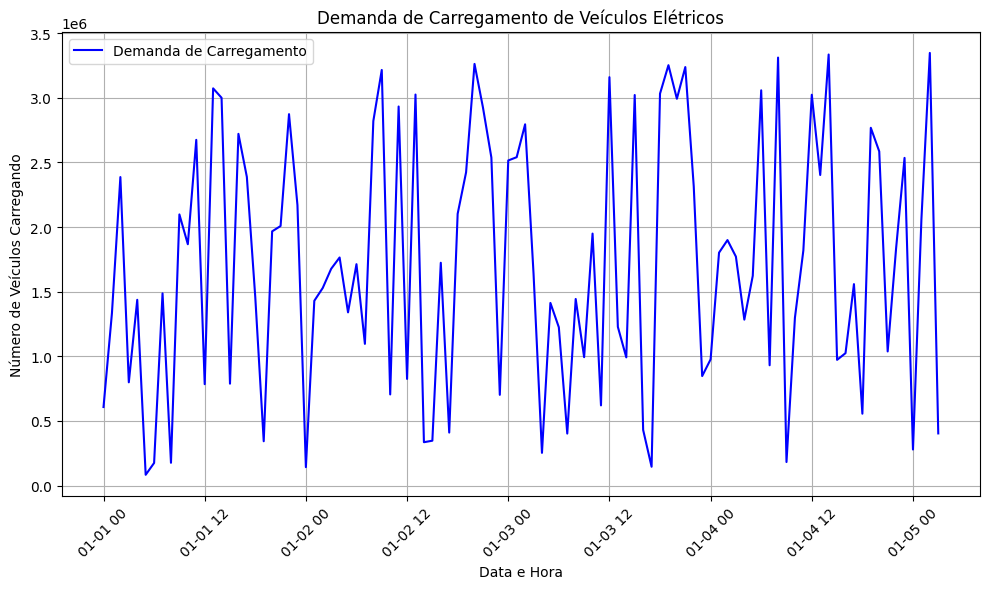

In [34]:
carros = pd.DataFrame({
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'],
    'Electric (EV)': [13000, 2700, 89800, 7100, 1256600],
    'Plug-In Hybrid Electric (PHEV)': [5800, 900000, 25600, 3200, 410700],
    'Hybrid Electric (HEV)': [63300, 10600, 175700, 37000, 1703200]
})

# Localizar a linha para a Califórnia e somar os valores
california_veiculos = carros.loc[carros['State'] == 'California', ['Electric (EV)', 'Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']].sum().sum()

# Gerar um DataFrame com dados históricos de demanda
historico = pd.DataFrame({
    'data_hora': pd.date_range(start='2024-01-01', periods=100, freq='H'),
    'numero_veiculos': np.random.randint(100, california_veiculos, size=100),  # Adicionando variação aleatória
    'preco_eletricidade': 0.25,  # Preço fixo de eletricidade para todos os registros
    'dia_da_semana': np.random.choice(['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'], 100),
    'hora_do_dia': pd.date_range(start='2024-01-01', periods=100, freq='H').hour,
})



# Convertendo para o formato correto
historico['data_hora'] = pd.to_datetime(historico['data_hora'])
historico['hora_do_dia'] = historico['data_hora'].dt.hour
historico['dia_da_semana'] = historico['data_hora'].dt.day_name()

# Codificar variáveis categóricas (dia da semana)
le = LabelEncoder()
historico['dia_da_semana'] = le.fit_transform(historico['dia_da_semana'])

# Definir a variável dependente (target) - exemplo: número de carros carregando
X = historico[['numero_veiculos', 'preco_eletricidade', 'hora_do_dia', 'dia_da_semana']]
y = historico['numero_veiculos']  # Variável dependente pode ser o número de veículos carregando

# Separar dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar a variação do número de veículos ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(historico['data_hora'], historico['numero_veiculos'], label='Demanda de Carregamento', color='blue')
plt.xlabel('Data e Hora')
plt.ylabel('Número de Veículos Carregando')
plt.title('Demanda de Carregamento de Veículos Elétricos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# Treinando um modelo de Regressão (Decision Tree)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Inicializando o modelo de regressão
modelo = DecisionTreeRegressor(random_state=42)

# Treinando o modelo
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE (Erro Médio Absoluto): {mae}')
print(f'MSE (Erro Quadrático Médio): {mse}')

MAE (Erro Médio Absoluto): 54808.95
MSE (Erro Quadrático Médio): 4925017001.95


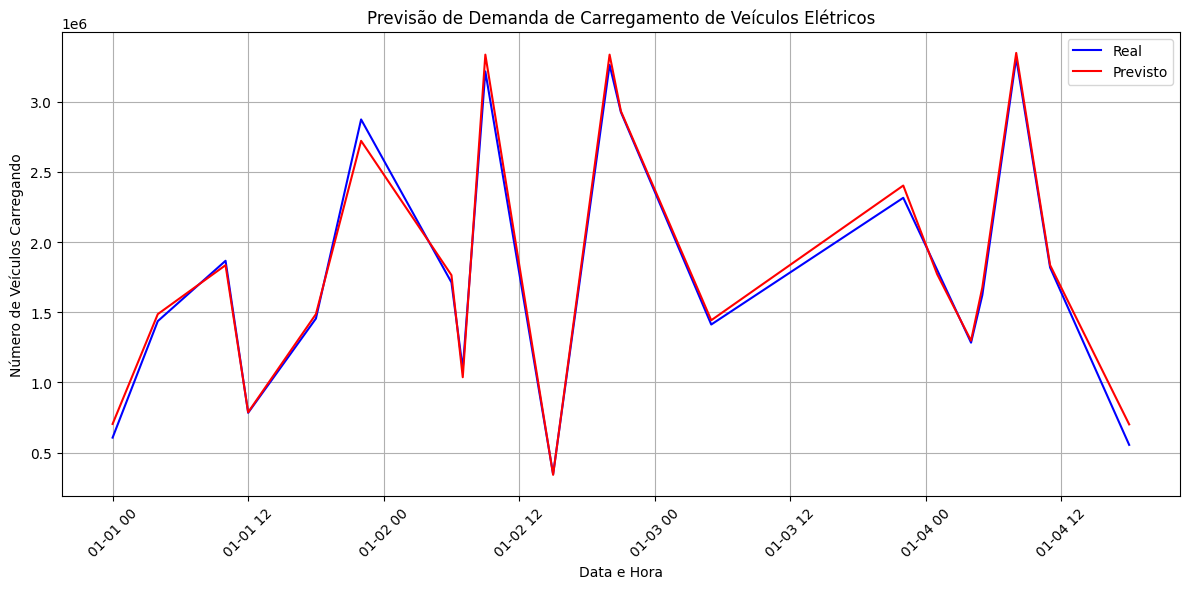

In [40]:
# Preparando os dados para visualização
# Usando o mesmo índice de `y_test` para manter a ordenação temporal
resultados = pd.DataFrame({
    'Data e Hora': historico['data_hora'].iloc[y_test.index],
    'Real': y_test,
    'Previsto': y_pred
}).sort_values('Data e Hora')

plt.figure(figsize=(12, 6))
plt.plot(resultados['Data e Hora'], resultados['Real'], label='Real', color='blue')
plt.plot(resultados['Data e Hora'], resultados['Previsto'], label='Previsto', color='red')
plt.xlabel('Data e Hora')
plt.ylabel('Número de Veículos Carregando')
plt.title('Previsão de Demanda de Carregamento de Veículos Elétricos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()